# Project: Investigate a Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>

<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusion">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
FREE DATA FROM WORLD BANK VIA GAPMINDER.ORG, 
> Gapminder has collected a lot of information about how people live their lives in different countries, tracked across the years, and on a number of different indicators.
> In the coal_consumption_total.csv dataset, (source: The coal consumption, total dataset in energy/coal/ folder on <a href="https://www.gapminder.org/data/">https://www.gapminder.org/data/</a>) the columns are the countries and value of coal consumption each year from 1965 to 2019

>In the oil_consumption_total.csv  dataset,(source: The oil consumption, total dataset in energy/oil/ folder on<a href="https://www.gapminder.org/data/">https://www.gapminder.org/data/</a>) the columns are the countries and value of oilconsumption each year from 1965 to 2019

>and in the consumption_co2_emissions_1000_tonnes.csv,  (source: The consumption_co2_emissions_1000_tonnes dataset in environments/emissions/ folder  on <a href="https://www.gapminder.org/data/">https://www.gapminder.org/data/</a>) the columns are the countries and value of co2 emissions each year from 1990 to 2017

### Question(s) for Analysis
><ul>
<li><a href="#coal">what is the general trend in the consumption of coal between 2007 and 2017</a></li>
<li><a href="#oil">what is the general trend in the consumption of oil between 2007 and 2017</a></li>
<li><a href="#co2">what is the general trend in the emission of co2 between 2007 and 2017</a></li>
<li><a href="#relhigh">What top 10 countries have the highest coal consumption, oil consumption and emission of co2</a></li>
<li><a href="#rellow">What top 10 countries have the lowest coal consumption, oil consumption and emission of co2</a></li>
</ul>

<a id='wrangling'></a>
## Data Wrangling


#### import libraries that are needed

In [1]:
import pandas as pd
import re

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Check relationships between consumption of coal, oil and co2 emissions

#### Import dataset on total cosumption of coals from 1965 to 2019 in all countries

In [2]:

coal_data = pd.read_csv('coal_consumption_total.csv')
coal_data.head(1)

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United Arab Emirates,0,0,0,0,0,0,0,0,0,...,658k,445k,1.38M,1.77M,1.97M,1.71M,1.84M,2.13M,2.41M,2.46M


#### Import dataset on total cosumption of oil from 1965 to 2019 in all countries

In [3]:
oil_data = pd.read_csv('oil_consumption_total.csv')
oil_data.head(1)

,country,1965,1966,1967,1968,1969,1970,1971,1972,1973,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,United Arab Emirates,69.6k,74.3k,79.8k,89.1k,99k,115k,136k,179k,280k,...,31.3M,33.8M,35.2M,39M,39.3M,42.2M,44.9M,44.2M,46M,44.6M


#### Import dataset on total co2 emmissions from fossil fuels consumption from 1990 to 2017 in all countries

In [4]:
co2_data = pd.read_csv('consumption_co2_emissions_1000_tonnes.csv')
co2_data.head(1)

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,Albania,5620,4570,2840,2630,2290,2460,2870,2190,2510,...,6130,6370,6140,6350,6060,5870,6300,5660,5500,5650


## Data cleaning

#### Limit data to between the years 2007 to 2017

In [5]:
cols = ['country'] + [str(x) for x in range(2007,2018)] # create list to get columns from 2009 to 2017,
cols                                                      #with country inclusive


['country',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017']

#### To combine the data from the three indicators to a single data

In [6]:
def clean_data(data, cols, var):
  ''' 
  docstring: clean data and rearrange data according to years https://pandas.pydata.org/docs/reference/api/pandas.melt.html
  input: data  - DataFrame, data to melt
         cols - string, columns to keep
         var - string, name of column values
  output: melted DataFrame
  '''
  data2 = data[cols].copy()
  data2 = pd.melt(data2, id_vars=['country'], var_name= 'year', value_name = var)
  return data2

In [7]:
# merge coal_data, oil_data and co2_data after they have been melted
data = clean_data(data = coal_data, cols= cols, var = 'coal')\
.merge(clean_data(data = oil_data, cols= cols, var = 'oil'), on = ['country', 'year'])\
.merge(clean_data(data = co2_data, cols= cols, var = 'co2'), on = ['country', 'year'])


In [8]:
data.head()

,country,year,coal,oil,co2
0,United Arab Emirates,2007,136k,28.7M,203k
1,Argentina,2007,1.23M,24.2M,161k
2,Australia,2007,55.9M,42.1M,358k
3,Austria,2007,3.86M,12.9M,101k
4,Azerbaijan,2007,4930,4.52M,32.2k


#### To convert the format of the values e.g k is 1000, M is 10^6 and B is 10^9

In [9]:
for column in data.columns[2:]:
  data[column] = data[column].replace({'k':'*1e3', 'M':'*1e6', 'B':'*1e9'}, regex = True).map(pd.eval).astype(int)
data.head()

,country,year,coal,oil,co2
0,United Arab Emirates,2007,136000,28700000,203000
1,Argentina,2007,1230000,24200000,161000
2,Australia,2007,55900000,42100000,358000
3,Austria,2007,3860000,12900000,101000
4,Azerbaijan,2007,4930,4520000,32200


#### To check for null values

In [10]:
data.isna().sum()

country    0
year       0
coal       0
oil        0
co2        0
dtype: int64

#### To check for duplicated values

In [11]:
data.duplicated().sum()

0

#### Check datatypes and change year column to datetime datatype

In [12]:
data['year'] = pd.to_datetime(data['year'])

In [13]:
data.dtypes

country            object
year       datetime64[ns]
coal                int64
oil                 int64
co2                 int64
dtype: object

#### Check for invalid values, outliers

In [14]:
data.describe()

,coal,oil,co2
count,8.030000e+02,8.030000e+02,8.030000e+02
mean,4.993194e+07,5.263674e+07,4.294369e+05
std,2.202716e+08,1.129780e+08,1.133047e+06
min,0.000000e+00,1.330000e+06,7.770000e+03
25%,8.115000e+05,8.100000e+06,5.735000e+04
50%,4.280000e+06,1.590000e+07,1.140000e+05
75%,1.765000e+07,5.220000e+07,3.530000e+05
max,1.970000e+09,9.080000e+08,8.560000e+06


<a id='eda'></a>
## EDA

<a id='coal'></a>
### average consumption of coal by all countries each year between 2007 and 2017

In [15]:
def trend_plot(column, name):
  ''' 
  docstring: plot trend in average consumption of coal, oil and co2 emissions by all countries each year between 2007 and 2017
  input: column - string,columns to plot
         name - string, name of plot
  output: plot
'''
  plt.figure(figsize = (10,5))
  data.groupby('year').mean()[column].plot()
  plt.title(f'Trend in {name} from 2007 to 2017', fontdict ={'fontsize': 14, 
  'verticalalignment': 'center_baseline', 'color': 'red'}, pad =15)
  plt.xlabel('years', labelpad= 10, fontdict ={'fontsize': 14, 
  'verticalalignment': 'center_baseline', 'color': 'red'});
  plt.ylabel(f'average {name} ', labelpad= 10, fontdict ={'fontsize': 14, 
  'verticalalignment': 'center_baseline', 'color': 'red'});



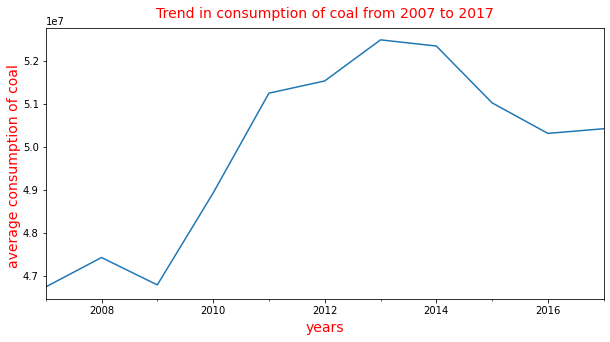

In [16]:
trend_plot('coal', 'consumption of coal')

**From 2009 there has been exponential growth in coal consumption and  a decline from 2014**

<a id='oil'></a>
### average consumption of oil between 2007 and 2017

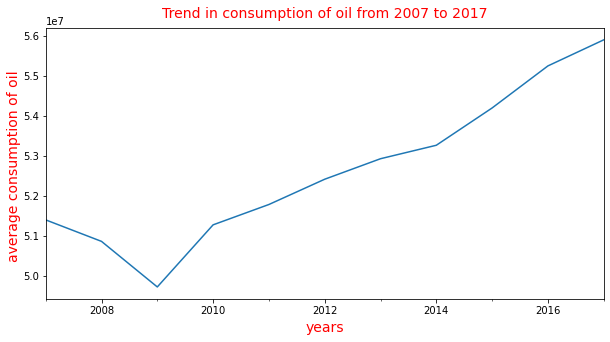

In [17]:
trend_plot('oil','consumption of oil')

**From 2009 there has been exponential growth in oil consumption**

<a id='co2'></a>
### average co2 emissions from fossil fuels consumption between 2007 and 2017

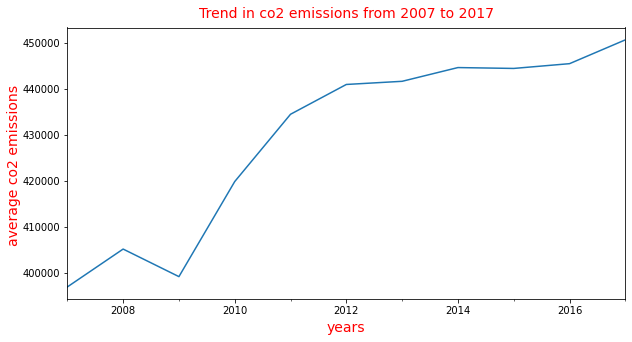

In [18]:
trend_plot('co2', 'co2 emissions')

**From 2009 there has been exponential growth in co2 emission**

### average coal consumption, oil consumption and emmission of co2 per country

In [19]:
def countries_plot(column, sort, name, level):
  ''' 
  docstring: plot top 10 countries that have the lowest and highest coal consumption,
   oil consumption and emmission of co2
  input: column - string, columns to plot
         sort - bool, if it should sort in ascending order
         name - string, name of plot
         level - string, lowest or highest
  output: plot
  '''
  plt.figure(figsize = (10,5))
  data.groupby('country').mean()[column].sort_values(ascending = sort).head(10).plot(kind ='bar')
  plt.xlabel('countries',  fontdict = {'fontsize':20, 'fontweight': 'bold', 'color':'red'})
  plt.ylabel(f'average {name}',  fontdict = {'fontsize':20,\
                                            'fontweight': 'bold', 'color':'red'}, labelpad = 15)
  plt.title(f'Top 10 countries with  {level}  {name} between 2007 to 2017',\
          fontdict = {'fontsize':20, 'fontweight': 'bold', 'color':'blue'}, pad = 15);

<a id='rellow'></a>
### top 10 countries that have the lowest coal consumption, oil consumption and emmission of co2


#### coal consumption

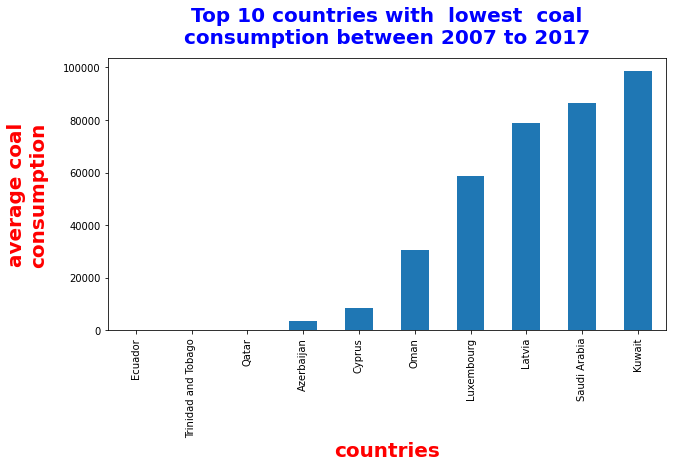

In [20]:
countries_plot('coal', True, 'coal\nconsumption', 'lowest')

**Ecuador, Trindad and Tobago, Qatar seem to have 0 coal consumption and the other countries in the plot have lesser coal consumption compared to other countries**

#### Oil consumption

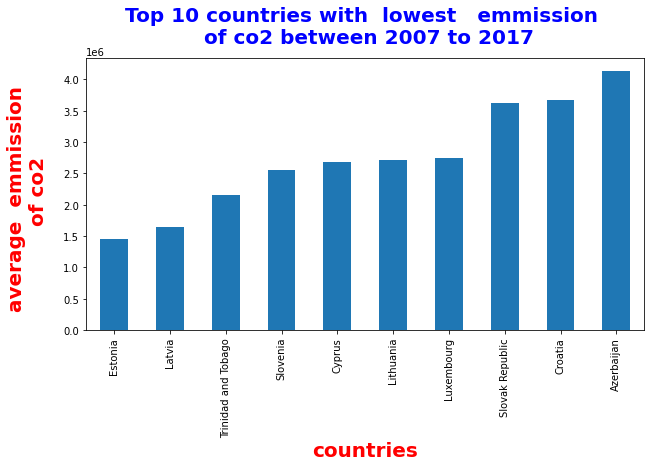

In [21]:
countries_plot('oil', True, ' emmission \n of co2', 'lowest')

**Estonia is the country with least oil consumption and the other countries in the plot have lesser oil consumption compared to other countries**

#### co2 emmissions

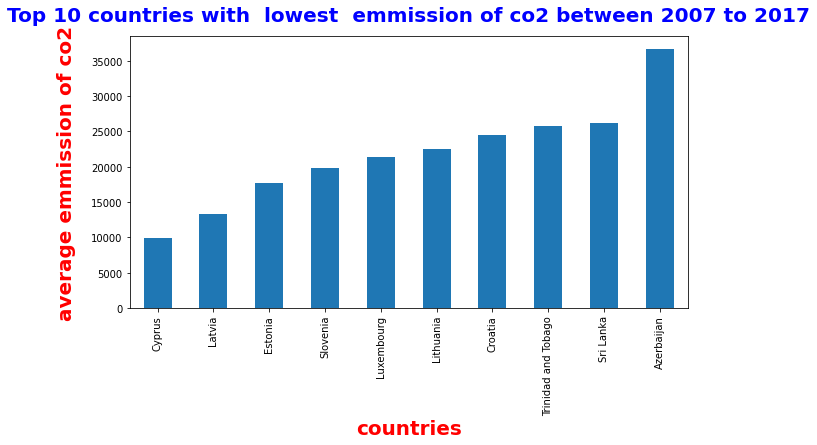

In [22]:
countries_plot('co2', True, 'emmission of co2', 'lowest')

**Cyprus is the country with least co2 emission and the other countries in the plot have lesser co2 emission compared to other countries**

<a id='relhigh'></a>
### top 10 countries that have the highest coal consumption, oil consumption and emmission of co2


#### coal consumption

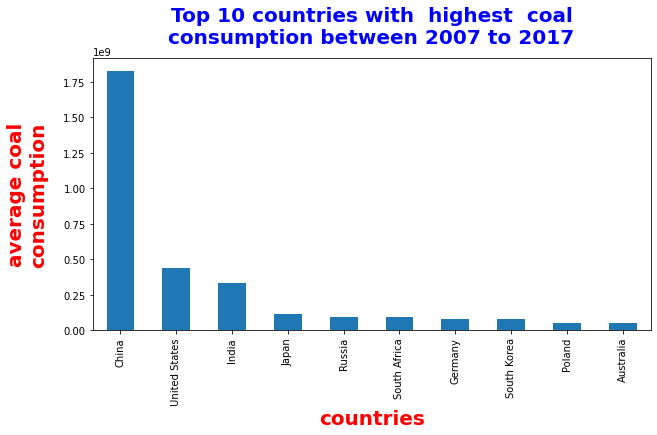

In [23]:
countries_plot('coal', False, 'coal\nconsumption', 'highest')

<b> United States, china have the highest consumption. </b>

#### Oil consumption

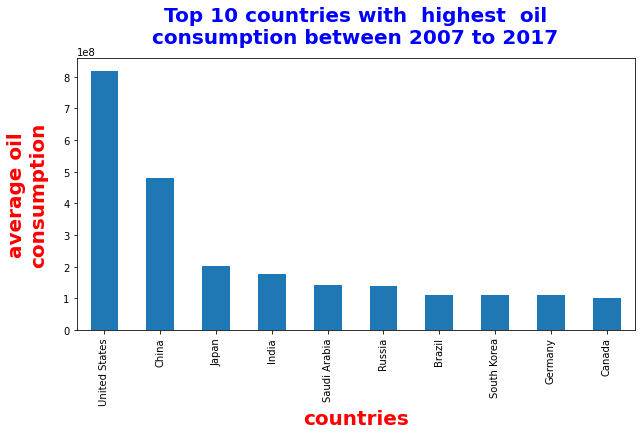

In [24]:
countries_plot('oil', False, 'oil\nconsumption', 'highest')

<b> United States, china have the highest consumption. </b>

#### co2 emmissions

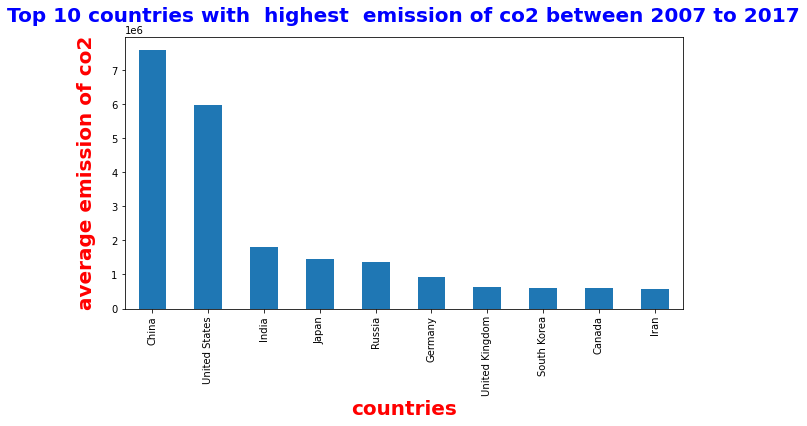

In [25]:
countries_plot('co2', False, 'emission of co2', 'highest')

<b> United States, china have the highest emission. </b>

#### Because United States, china, india, Japan have both high consumption and emission.I want to check the  relationship of the three indicators in these countries during the decade

In [26]:
def count(df, countryname):
  country_data = df.query(countryname)
  country_data =country_data[df.columns[1:].to_list()]
  country_data.index = country_data['year']
  country_data = country_data.drop(['year'], axis = 1)
  return country_data

In [27]:
def rel_plot(df, country):
  df.plot(subplots = True, figsize = (10,8), title =[f'consumption of coal in {country}',
       f'consumption of oil in {country}',
      f'emmission of co2 in {country}'],)

#### Data on United States

In [28]:
us = count(df = data, countryname = "country == 'United States'")
us

,coal,oil,co2
year,,,
2007-01-01,545000000,908000000,6590000
2008-01-01,536000000,847000000,6320000
2009-01-01,471000000,801000000,5830000
2010-01-01,499000000,813000000,6040000
2011-01-01,471000000,796000000,6010000
2012-01-01,416000000,778000000,5790000
2013-01-01,432000000,791000000,5900000
2014-01-01,431000000,796000000,5940000
2015-01-01,372000000,813000000,5810000


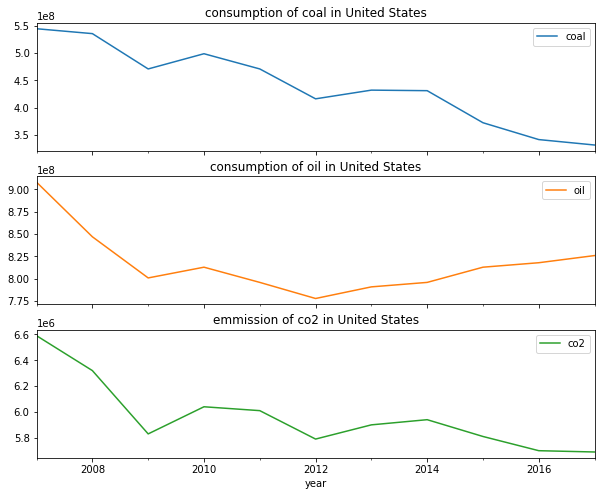

In [29]:
rel_plot(us, 'United States')

**There seems to b
e positive correlation between the three indicators in United States**

#### Data on China

In [30]:
china = count(df = data, countryname = "country == 'China'")
china

,coal,oil,co2
year,,,
2007-01-01,1580000000,369000000,5570000
2008-01-01,1610000000,376000000,5990000
2009-01-01,1690000000,391000000,6630000
2010-01-01,1750000000,446000000,7240000
2011-01-01,1900000000,462000000,7950000
2012-01-01,1930000000,484000000,8199999
2013-01-01,1970000000,505000000,8320000
2014-01-01,1950000000,524000000,8320000
2015-01-01,1910000000,558000000,8350000


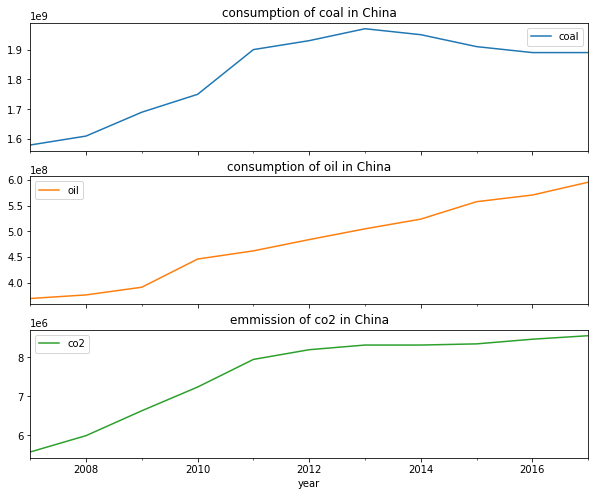

In [31]:
rel_plot(china, 'China')

**There seems to be positive correlation between the three indicators in China**

#### Data on India

In [32]:
india = count(df = data, countryname = "country == 'India'")
india

,coal,oil,co2
year,,,
2007-01-01,240000000,139000000,1300000
2008-01-01,259000000,146000000,1430000
2009-01-01,281000000,154000000,1630000
2010-01-01,290000000,157000000,1610000
2011-01-01,305000000,164000000,1690000
2012-01-01,330000000,175000000,1830000
2013-01-01,353000000,176000000,1800000
2014-01-01,388000000,182000000,1990000
2015-01-01,395000000,197000000,2110000


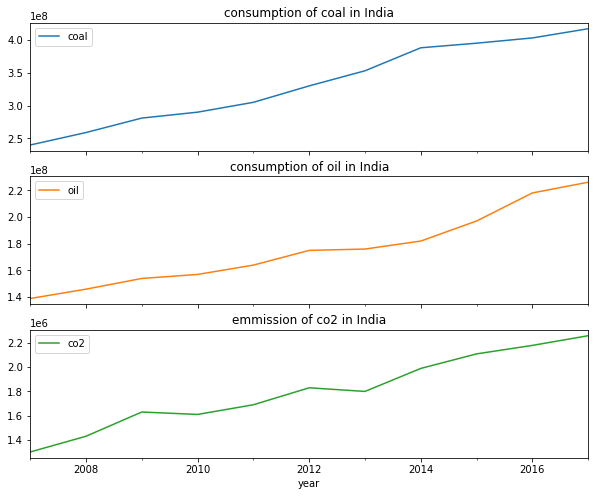

In [33]:
rel_plot(india, 'India')

**There seems to be positive correlation between the three indicators in India**

#### Data on Japan

In [34]:
japan = count(df = data, countryname = "country == 'Japan'")
japan

,coal,oil,co2
year,,,
2007-01-01,118000000,231000000,1500000
2008-01-01,122000000,225000000,1460000
2009-01-01,102000000,200000000,1360000
2010-01-01,116000000,202000000,1410000
2011-01-01,110000000,203000000,1490000
2012-01-01,116000000,217000000,1540000
2013-01-01,121000000,207000000,1520000
2014-01-01,119000000,197000000,1470000
2015-01-01,120000000,189000000,1430000


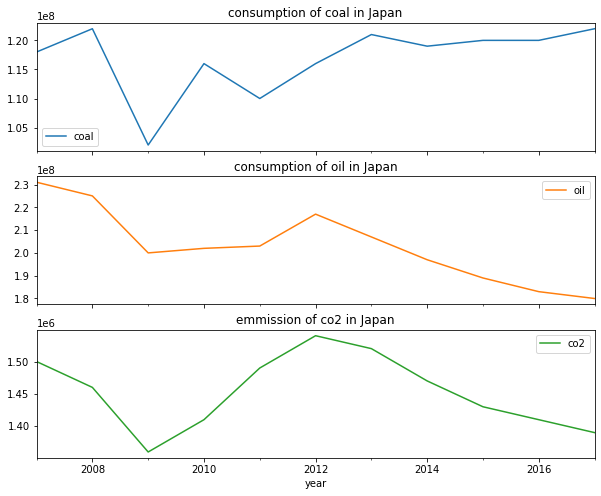

In [35]:
rel_plot(japan, 'Japan')

**There seems to be positive correlation between the three indicators in Japan**

<a id='conclusion'></a>

#### Conclusion 

From the analysis: 
> *   Analysis were made on the trend in consumption of coal and oil,co2 emission between 2007 and 2017. 

> *    Analysis were made to check countries with low and high consumption of coal and oil,co2 emission between 2007 and 2017.

> *   It seems the consumption of oil has more effect than coal consumption on co2 emission.

> *   More focus should be on  United States, china, india, Japan to get more insights on why they have high co2 emission and solve environmental problems.

> *  From 2009 there has been exponential growth in consumption of coal and oil,co2 emission.

> * A limitation  faced is getting enough data on indicators related to co2 emission.








